# 17-2 scipy differentiate, interpolate, optimize

## `scipy.differentiate`
Just like we saw that `scipy` could approximate the value of a function, it can compute its derivative.

Note that numerical differentiation is prone to loss of accuracy:
suppose we can compute an approximation of $f(x)$ with accuracy $\varepsilon$.
If we use the estimate $f'(x) \simeq \frac{f(x+h) - f(x)}{h}$, the accuracy of this estimate for  $f'(x)$ is $2h\varepsilon$ which diverges as $h \to 0$. Numpy uses better approaches that are *less* prone to error build up, but cannot be error-free.

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import scipy

     success: [ True  True ...  True  True]
      status: [0 0 ... 0 0]
          df: [-2.500e-01 -2.522e-01 ...  2.522e-01  2.500e-01]
       error: [ 1.568e-11  1.837e-11 ...  1.837e-11  1.568e-11]
         nit: [3 3 ... 3 3]
        nfev: [13 13 ... 13 13]
           x: [-4.000e+00 -3.920e+00 ...  3.920e+00  4.000e+00]


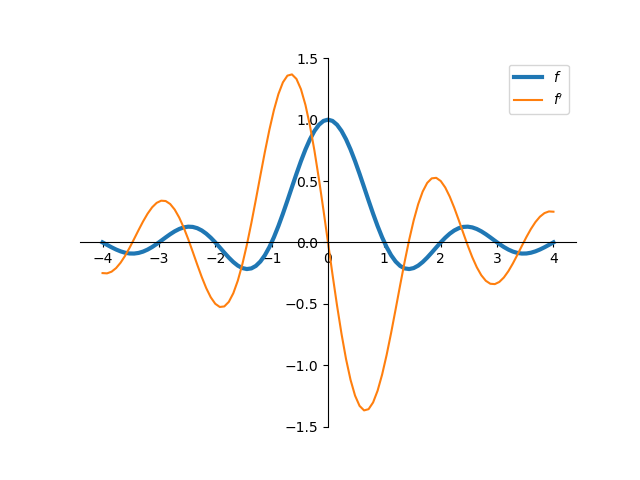

In [28]:
def f(x):
    return np.sinc(x)
X = np.linspace(-4,4,101)

res = scipy.differentiate.derivative(f, X)
print(res)

Fprime = res.df
fig, ax = plt.subplots()
ax.plot(X,f(X), label='$f$', linewidth=3)
ax.plot(X,Fprime,label = "$f'$")
ax.spines[['left', 'bottom']].set_position('zero')
ax.spines[['top', 'right']].set_visible(False)
ax.legend()


## `scipy.optimize`: solving equations, minimizing functions
### `scipy.optimize.root_scalar`:
This is a general function to solve equations of the form $f(x) = 0$ using one of several root-finding algorithms (including bisection, Newton, secant, ...) See the documentation [here](`https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html#root-scalar#scipy.optimize.root_scalar)

Calling sequence:  `scipy.optimize.root_scalar(f, args=(), method=None, bracket=None, fprime=None, fprime2=None, x0=None, x1=None, xtol=None, rtol=None, maxiter=None)`

* `f` should return the value of the function, or the function and its first (and possibly second) derivative in a tuple
* `args` is as in integrate
* `method` is optional. Possible values include `bisect`, `newton`, `secant`, `brentq` (which combines sall three of these methods).
* `bracket` is a bracketing interval of a solution
* `x0` is an initial guess
* `x1` is a second guess
* If `fprime` is `True`, `f` is expected to return the function and its first derivative
* If `fprime2` is `True`, `f` is expected to return the function and its first and second derivative
* `xtol`, `rtol`, `maxiter` are respectively the desired accuracy on the root, the value of the function and the number of iterations to perform.
`scipy.optimize.root_scalar` returns a [`RootResults` object ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.RootResults.html#scipy.optimize.RootResults)

`scipy.optimize.root_scalar` will pick a method depending on the arguments that are provided 


scipy.optimize.root_scalar(f, x0=3.5)
      converged: True
           flag: converged
 function_calls: 6
     iterations: 3
           root: 7.000000000000001
         method: newton

scipy.optimize.root_scalar(f, bracket=[0,3.5], method='bisect')
      converged: True
           flag: converged
 function_calls: 43
     iterations: 41
           root: 0.9999999999997726
         method: bisect

scipy.optimize.root_scalar(f, bracket=[0,3.5], method='brentq')
      converged: True
           flag: converged
 function_calls: 10
     iterations: 9
           root: 3.0
         method: brentq


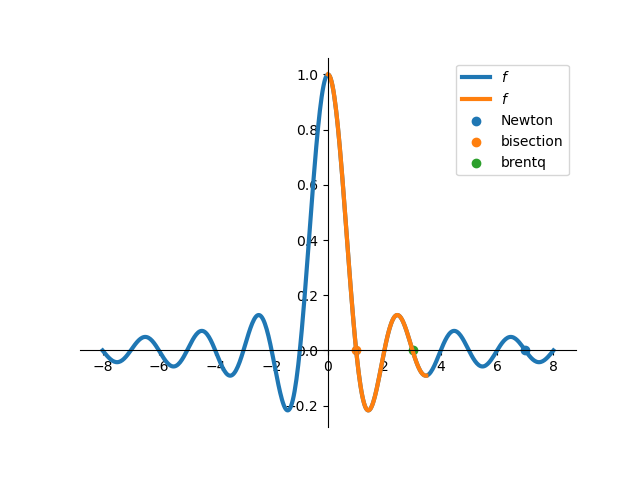

In [29]:
X = np.linspace(-8,8,501)
fig, ax = plt.subplots()
ax.plot(X,f(X), label='$f$', linewidth=3)
Xb = [x for x in X if 0 <= x <= 3.5]
ax.plot(Xb,f(Xb), label='$f$', linewidth=3)
ax.spines[['left', 'bottom']].set_position('zero')
ax.spines[['top', 'right']].set_visible(False)

print('scipy.optimize.root_scalar(f, x0=3.5)')
sol = scipy.optimize.root_scalar(f, x0=3.5)
print(sol)
ax.scatter([sol.root], [f(sol.root)],label='Newton')

print("\nscipy.optimize.root_scalar(f, bracket=[0,3.5], method='bisect')")
sol = scipy.optimize.root_scalar(f, bracket=[0,3.5], method='bisect')
print(sol)
ax.scatter([sol.root], [f(sol.root)],label='bisection')

print("\nscipy.optimize.root_scalar(f, bracket=[0,3.5], method='brentq')")
sol = scipy.optimize.root_scalar(f, bracket=[0,3.5], method='brentq')
print(sol)
ax.scatter([sol.root], [f(sol.root)],label = 'brentq')

ax.legend()

An application:
Given any $p \in \mathbb{R}$, let  $f_p(x) = \frac{x^2-1}{2} - p^2 \ln(x)$.  then $f'_p(x) = x-p^2/x$ and $f'(p) = 0$
Given $\ell > 0$, can we find p such that $f_p(p) = -4\ell^2$?

We have that $f_p(p) = \frac{p^2-1}{2}-p^2\ln(p)$, so we must solve $f_p(p) = \frac{p^2-1}{2}-p^2\ln(p) = 4\ell^2$ for any given $\ell$.

Let's use an interactor to get an idea of the solution of this problem:

interactive(children=(FloatSlider(value=1.5000000000000002, description='p', max=3.0, min=0.1), FloatSlider(va…

<function __main__.plotf(p, ell)>

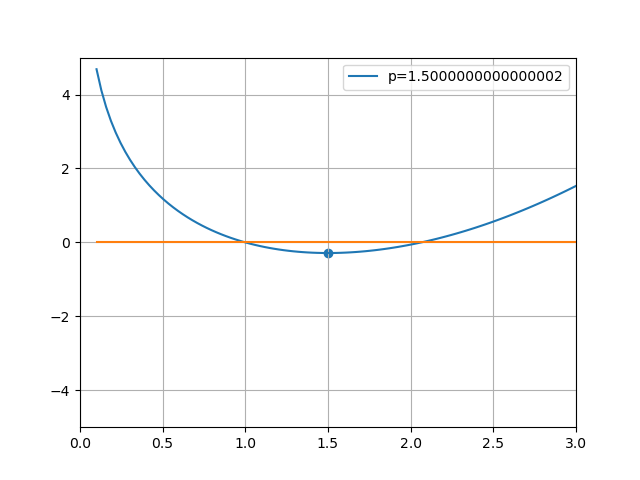

In [17]:
def f(p,x):
    return (x**2-1)/2 - p**2 * np.log(x)

from ipywidgets import interact

def plotf(p,ell):
    ax.cla()
    X=np.linspace(0.1,3,101)
    ax.plot(X,[f(p,x) for x in X],label = f'p={p}')
    ax.plot([X[0],X[-1]],[-4*ell**2,-4*ell**2])
    ax.scatter([p],[f(p,p)])
    ax.axis([0,3,-5,5])
    ax.grid()
    ax.legend()

fig, ax = plt.subplots()
ax.grid()
interact(plotf, p=(0.1,3,0.1),ell = (0,1,0.1))


It looks like for $\ell = 1$, $p\in(2.5,3)$ between 1.8 and 1, and that for $\ell = 0.5$, $p \in (1.5,2)$



Let's now find $p$ using `scipy.optimize.root_scalar`


0.7127035067566301
-0.27258872223978114
      converged: True
           flag: converged
 function_calls: 8
     iterations: 7
           root: 1.895025455414376
         method: brentq
found p: 1.895025455414376, f(1.895025455414376,1.895025455414376) = -0.9999999999998983


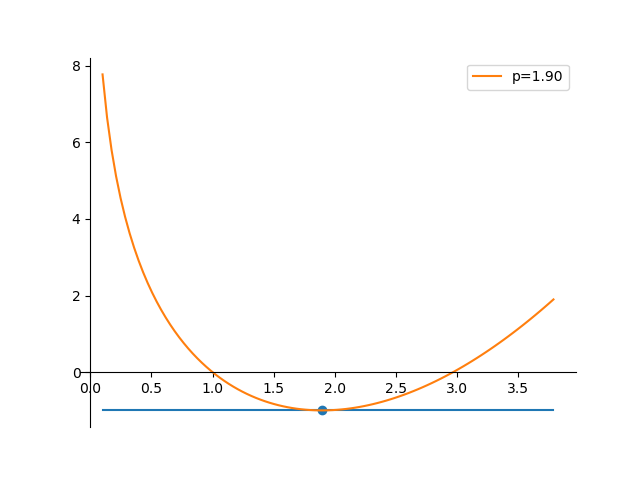

In [11]:
ell = 0.5
for p in (1.5,2):
    print(f(p,p)+4*ell**2)

sol = scipy.optimize.root_scalar(lambda p : f(p,p)+4*ell**2, bracket = (1.5,2))
print(sol)
print(f'found p: {sol.root}, f({sol.root},{sol.root}) = {f(sol.root,sol.root)}')

p = sol.root
fig, ax = plt.subplots()
X=np.linspace(0.1,2*p,101)
ax.plot([X[0],X[-1]],[-4*ell**2,-4*ell**2])
ax.plot(X,[f(p,x) for x in X],label = f'p={p:2.2f}')
ax.scatter([p],[f(p,p)])
ax.spines[['left', 'bottom']].set_position('zero')
ax.spines[['top', 'right']].set_visible(False)
ax.grid()
ax.legend()
ax.grid()


### Solving systems of equations

We saw that systems of *linear* equations can be solved by forming the matrix of coefficients, the right hand side and calling `numpy.linalg.solve`

Consider for instance
$$\begin{cases}
x + 2y + z & = 5\\
2x + 3y -z & = 8\\
x-y-z& =-1
\end{cases}
$$


In [25]:
A = np.array([[1,2,1],
              [2,3,-1],
              [1,-1,-1]])

b = np.array([5,8,-1])
x = np.linalg.solve(A,b)
print(x)

[ 1.00000000e+00  2.00000000e+00 -3.96508223e-17]


We will see later how to use `scipy` instead of `numpy` for this problem.

Consider a system of *non-linear* equations of the form
$$\begin{cases}
f_0(x,y) & = 0\\
f_1(x,y) & = 0
\end{cases}
$$
where $f_0$ and $f_1$ are two given functions.

`scipy.optimize.root` will try hard to solve this system of equations (but may not succeed).

For instance, let's try to find 2 numbers given their sum $S$ and product $P$.
We define $f(x,y) = (x+y-S, x*y-P)$ and try to solve f(x,y) = (0,0)$:

In [ ]:
def f(x,S,P):
    return (x[0] + x[1] - S, x[0] * x[1] - P)
roots = scipy.optimize.root(f,(0.,0.),args=(3,2))
print(roots)

TypeError: root() missing 1 required positional argument: 'x0'

Notes that a better way to find these numbers is by solving the quadratic equation $x^2-Sx+P = 0$

In [43]:
from numpy.polynomial import Polynomial
S = 3
P = 2
p = Polynomial([P,S,1])
print(p.roots())

[-2. -1.]


## Finding extrema of functions

As indicated by its name, `scipy,optimize` is primarily designed to find extrema of functions. For functoin of a single variable, the main tool is `scipy.optimize.minimize_scalar`.

Let's find the extrema of the function $f(x) = (x-2)(x+1)^2$.


 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -4.0
       x: 1.0
     nit: 7
    nfev: 10


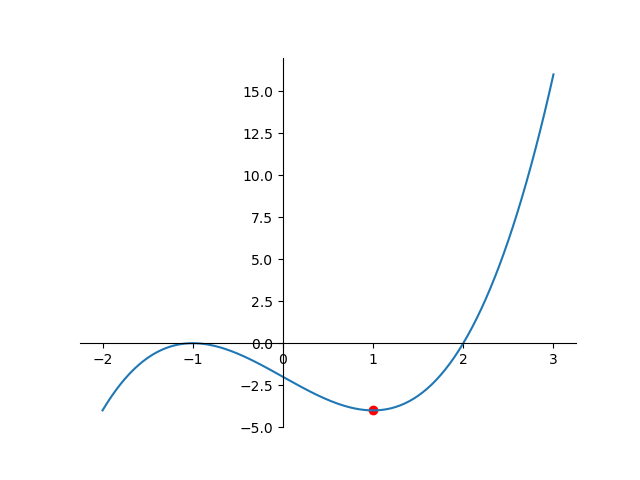

In [91]:
f = lambda x: (x - 2) * (x + 1)**2

fig, ax = plt.subplots()
X = np.linspace(-2,3,201)
ax.plot(X,f(X))
ax.spines[['left', 'bottom']].set_position('zero')
ax.spines[['top', 'right']].set_visible(False)

res = scipy.optimize.minimize_scalar(f)
plt.scatter(res.x, f(res.x),color='red')
print(res)

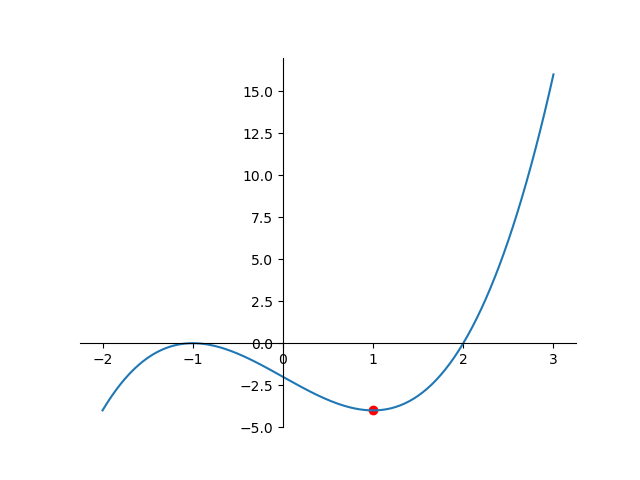

Note that 1 is *not* the *global* minimizer of this function (since $\lim_{x \to -\infty} f(x) = -\infty$ ), but only a *local* minimizer.

When a function admits multiple local minimizer, there is no way to make sure that the scheme will converge to the "best" one.

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 2.3063132757087517
       x: 0.8348319213728642
     nit: 12
    nfev: 15
 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -5.159945770802011
       x: -2.123275673236978
     nit: 13
    nfev: 16


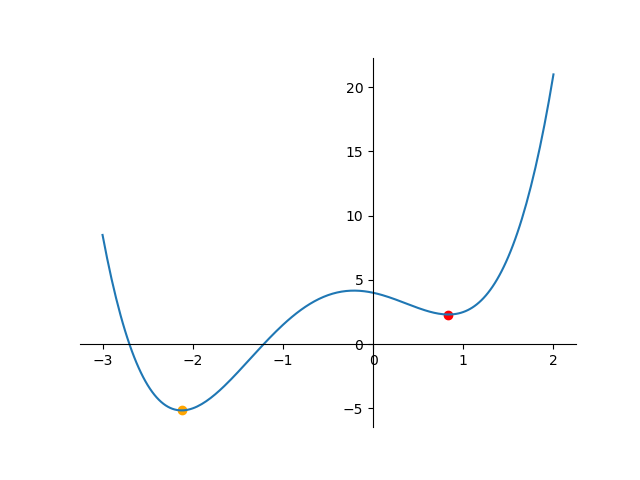

In [ ]:
g = lambda x: (x - 1)**2 * (x + 2)**2 + 5*x/2
fig, ax = plt.subplots()
X = np.linspace(-3,2,201)
ax.plot(X,g(X))
ax.spines[['left', 'bottom']].set_position('zero')
ax.spines[['top', 'right']].set_visible(False)

# Here, scipy.optimize.minimize_scalar will give the "wrong" local minimizer:
res = scipy.optimize.minimize_scalar(g)
plt.scatter(res.x, g(res.x),color='red')
print(res)

# If we give an initial bracket, it will also fund eth other local minimum:
res2 = scipy.optimize.minimize_scalar(g, bracket = (-3,-1))
plt.scatter(res2.x, g(res2.x),color='orange')
print(res2)


We can also find extrema in a close interval:

 message: Solution found.
 success: True
  status: 0
     fun: 1.5000387454898165
       x: -0.9999940391390134
     nit: 25
    nfev: 25


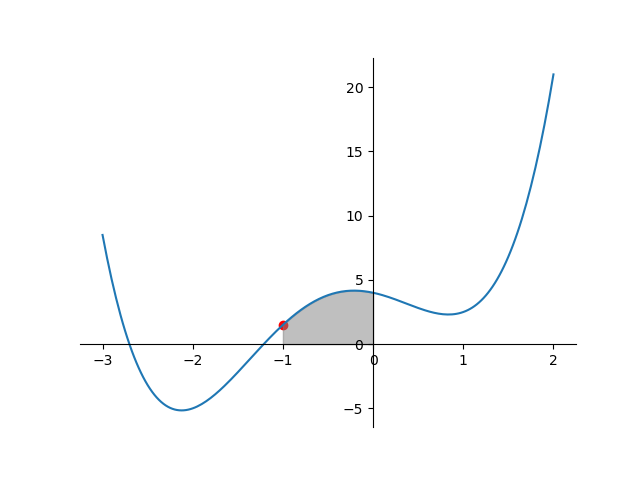

In [95]:
g = lambda x: (x - 1)**2 * (x + 2)**2 + 5*x/2
fig, ax = plt.subplots()
X = np.linspace(-3,2,201)
ax.plot(X,g(X))
ax.spines[['left', 'bottom']].set_position('zero')
ax.spines[['top', 'right']].set_visible(False)

# Here, scipy.optimize.minimize_scalar will give the "wrong" local minimizer:
res = scipy.optimize.minimize_scalar(g,bounds=(-1,0))
plt.scatter(res.x, g(res.x),color='red')
X = np.linspace(-1,0,101)
plt.fill_between(X,g(X),color='grey', alpha = 0.5)
print(res)
